## **Lab Assignment 1: Text Preprocessing and Regular Expressions**

In [5]:
import re, spacy
from nltk.stem import PorterStemmer
import en_core_web_sm

nlp = en_core_web_sm.load()

text = """
Reach out to us at support@domain.com, helpdesk123@service.net, or call us at
+44-20-7946-0958; for quick help, use #CustomerSupport, #24x7Help, or #tech_support
on social media. You can also email admin.mail@company.co.uk or contact@info.ai!
"""

# Use SpaCy for tokens instead
doc = nlp(text)
tokens = [token.text for token in doc]

# Stemming using NLTK
stemmer = PorterStemmer()
stems = [stemmer.stem(word) for word in tokens]

# Lemmatization from SpaCy
lemmas = [token.lemma_ for token in doc]

# Regex
emails = re.findall(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', text)
phones = re.findall(r'\+?\(?\d{1,4}\)?[-\s]?\d{2,4}[-\s]?\d{3,4}[-\s]?\d{3,4}', text)
hashtags = re.findall(r'#\w+', text)

print("Tokens:", tokens)
print("Stems:", stems)
print("Lemmas:", lemmas)
print("Emails:", emails)
print("Phones:", phones)
print("Hashtags:", hashtags)

Tokens: ['\n', 'Reach', 'out', 'to', 'us', 'at', 'support@domain.com', ',', 'helpdesk123@service.net', ',', 'or', 'call', 'us', 'at', '\n', '+44', '-', '20', '-', '7946', '-', '0958', ';', 'for', 'quick', 'help', ',', 'use', '#', 'CustomerSupport', ',', '#', '24x7Help', ',', 'or', '#', 'tech_support', '\n', 'on', 'social', 'media', '.', 'You', 'can', 'also', 'email', 'admin.mail@company.co.uk', 'or', 'contact@info.ai', '!', '\n']
Stems: ['\n', 'reach', 'out', 'to', 'us', 'at', 'support@domain.com', ',', 'helpdesk123@service.net', ',', 'or', 'call', 'us', 'at', '\n', '+44', '-', '20', '-', '7946', '-', '0958', ';', 'for', 'quick', 'help', ',', 'use', '#', 'customersupport', ',', '#', '24x7help', ',', 'or', '#', 'tech_support', '\n', 'on', 'social', 'media', '.', 'you', 'can', 'also', 'email', 'admin.mail@company.co.uk', 'or', 'contact@info.ai', '!', '\n']
Lemmas: ['\n', 'reach', 'out', 'to', 'we', 'at', 'support@domain.com', ',', 'helpdesk123@service.net', ',', 'or', 'call', 'we', 'at',

## **Lab Assignment 2: Part-of-Speech (POS) Tagging**

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Counter({'NN': 125847, 'NNP': 116222, 'IN': 108007, 'DT': 70878, 'JJ': 64352, 'NNS': 43904, 'VBD': 38686, ',': 35738, 'CD': 32836, 'RB': 23604, 'VB': 23017, 'TO': 21756, 'CC': 20963, 'VBN': 18573, 'VBG': 17587, 'PRP': 14642, '.': 13440, 'VBZ': 12542, 'PRP$': 9481, 'VBP': 9465, 'MD': 7550, '``': 6158, ':': 5219, "''": 4533, ')': 3952, '(': 3951, 'POS': 3358, 'WDT': 3299, 'RP': 3133, 'JJR': 2775, '$': 2715, 'WP': 2300, 'JJS': 2241, 'WRB': 2068, 'NNPS': 1718, 'RBR': 1130, 'EX': 666, 'RBS': 332, 'PDT': 318, 'FW': 286, 'WP$': 133, 'SYM': 37, '#': 34, 'UH': 27})


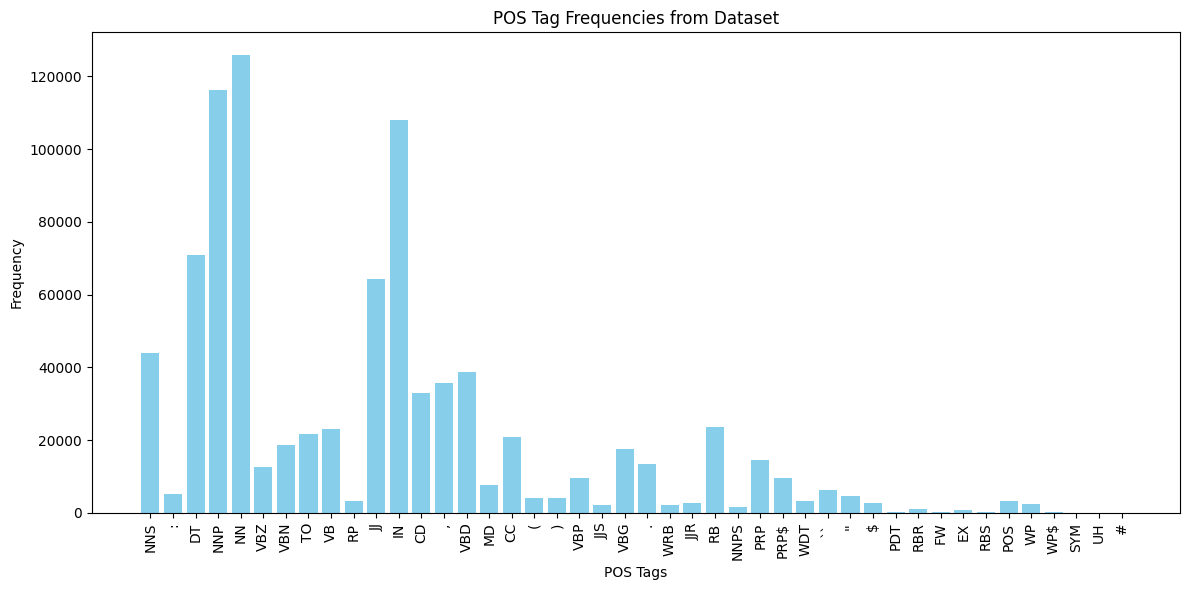

In [6]:
import nltk
from nltk import pos_tag, word_tokenize
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('averaged_perceptron_tagger')
nltk.download('averaged_perceptron_tagger_eng')

csv_path = 'news_articles.csv'
df = pd.read_csv(csv_path, encoding='ISO-8859-1')
text = " ".join(df['Article'].dropna().astype(str).tolist())

tokens = word_tokenize(text)
tags = pos_tag(tokens)
tag_freq = Counter(tag for word, tag in tags)

print(tag_freq)
plt.figure(figsize=(12, 6))
plt.bar(tag_freq.keys(), tag_freq.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title("POS Tag Frequencies from Dataset")
plt.xlabel("POS Tags")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

## **Lab Assignment 3: Morphological Analysis using Finite State Transducers (FST)**

In [7]:
words = ["running", "happier", "unhappy"]
rules = {
    "running": ("run", "ing"),
    "happier": ("happy", "er"),
    "unhappy": ("un", "happy")
}

for word in words:
    print(f"{word} → {' + '.join(rules.get(word, [word]))}")

running → run + ing
happier → happy + er
unhappy → un + happy


## **Lab Assignment 4: Syntactic Parsing using a Dependency Parser**

In [8]:
import spacy
from spacy import displacy
import pandas as pd

nlp = spacy.load("en_core_web_sm")

sentences = [
    "The quick brown fox jumps over the lazy dog.",
    "Apple is looking at buying a startup in the UK.",
    "The weather today is very pleasant and sunny.",
    "The child was playing in the garden with a ball.",
    "She received an award for her outstanding performance."
]

docs = [nlp(sent) for sent in sentences]

for doc in docs:
    displacy.render(doc, style="dep", jupyter=True)

for doc in docs:
    print("\nSentence:", doc.text)
    for token in doc:
        print(f"{token.text:10} --> {token.dep_:15} (head: {token.head.text})")


Sentence: The quick brown fox jumps over the lazy dog.
The        --> det             (head: fox)
quick      --> amod            (head: fox)
brown      --> amod            (head: fox)
fox        --> nsubj           (head: jumps)
jumps      --> ROOT            (head: jumps)
over       --> prep            (head: jumps)
the        --> det             (head: dog)
lazy       --> amod            (head: dog)
dog        --> pobj            (head: over)
.          --> punct           (head: jumps)

Sentence: Apple is looking at buying a startup in the UK.
Apple      --> nsubj           (head: looking)
is         --> aux             (head: looking)
looking    --> ROOT            (head: looking)
at         --> prep            (head: looking)
buying     --> pcomp           (head: at)
a          --> det             (head: startup)
startup    --> dobj            (head: buying)
in         --> prep            (head: buying)
the        --> det             (head: UK)
UK         --> pobj            (hea

## **Lab Assignment 5: N-gram Language Model**

In [9]:
import spacy
from nltk.lm.preprocessing import padded_everygram_pipeline
from nltk.lm import Laplace
from nltk.util import ngrams

# Load spaCy model
import en_core_web_sm
nlp = en_core_web_sm.load()

# Text input
text = "The dog barked at the mailman"

# Tokenization using spaCy
doc = nlp(text.lower())
tokens = [token.text for token in doc if not token.is_space]

# Create bigrams with padding
n = 2
train_data, padded_vocab = padded_everygram_pipeline(n, [tokens])

# Train Laplace-smoothed bigram model
model = Laplace(n)
model.fit(train_data, padded_vocab)

# Score predictions
print(model.score("dog", ["the"]))      # P(dog | the)
print(model.score("barked", ["dog"]))   # P(barked | dog)

0.2
0.2222222222222222


## **Lab Assignment 6: Word Embeddings with word2vec**

In [10]:
!pip install scipy==1.10.1 numpy==1.23.5 gensim==4.3.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.9/58.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.1/34.1 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 13.2 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.10.1 which is incompatible.
jax 0.5.2 requires numpy>

[==================================================] 100.0% 31.6/31.6MB downloaded


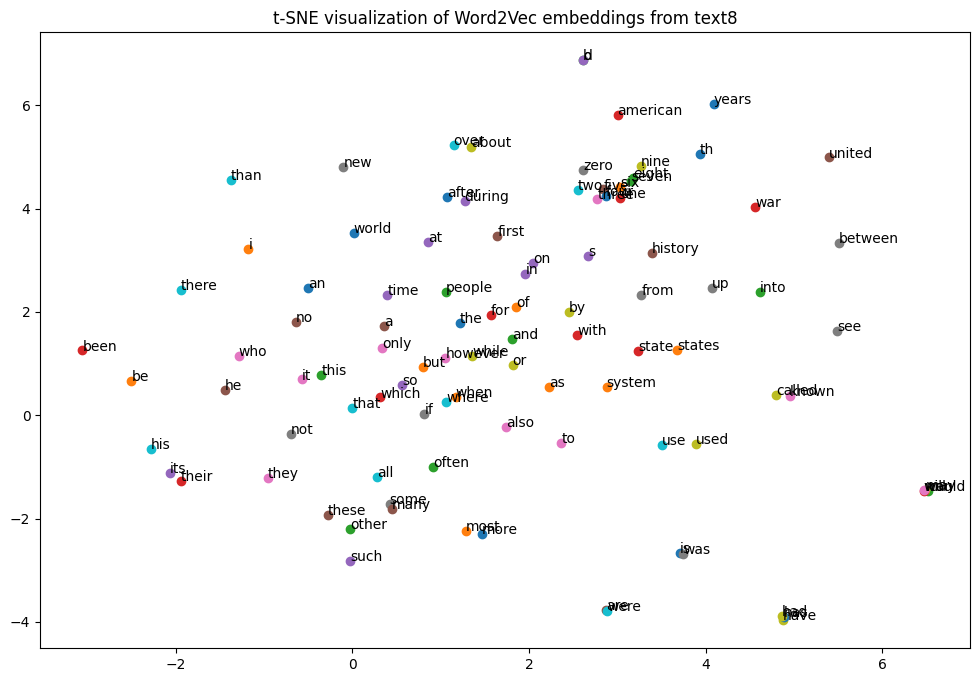

Words similar to 'science':
sciences: 0.6529
psychology: 0.6501
anthropology: 0.6221
humanities: 0.6078
philosophy: 0.6055


In [1]:
import gensim.downloader as api
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

dataset = api.load("text8")
data = [word for word in dataset]
sentences = list(dataset)

model = Word2Vec(sentences=sentences, vector_size=100, window=5, min_count=5, workers=4)

words = list(model.wv.index_to_key)[:100]
word_vectors = model.wv[words]

tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(word_vectors)

plt.figure(figsize=(12, 8))
for i, word in enumerate(words):
    plt.scatter(X_tsne[i, 0], X_tsne[i, 1])
    plt.annotate(word, (X_tsne[i, 0], X_tsne[i, 1]))
plt.title("t-SNE visualization of Word2Vec embeddings from text8")
plt.show()

similar_words = model.wv.most_similar("science", topn=5)
print("Words similar to 'science':")
for word, score in similar_words:
    print(f"{word}: {score:.4f}")

## **Lab Assignment 7: Implementing the Vector Space Model for Information Retrieval**

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

documents = [
    "The capital of France is Paris.",
    "Python is a programming language.",
    "Paris is known for the Eiffel Tower.",
    "The Eiffel Tower is a famous landmark in Paris.",
    "Java and Python are popular programming languages."
]

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(documents)

query = input("Enter your search query: ")
query_vec = vectorizer.transform([query])

similarities = cosine_similarity(query_vec, tfidf_matrix).flatten()
results = sorted(list(enumerate(similarities)), key=lambda x: x[1], reverse=True)

for idx, score in results:
    if score > 0:
        print(f"Score: {score:.4f} | Document: {documents[idx]}")

Enter your search query: What is the capital of France?
Score: 0.9453 | Document: The capital of France is Paris.
Score: 0.1857 | Document: Paris is known for the Eiffel Tower.
Score: 0.1680 | Document: The Eiffel Tower is a famous landmark in Paris.
Score: 0.1011 | Document: Python is a programming language.


## **Lab Assignment 8: Named Entity Recognition (NER) using spaCy**

In [3]:
import pandas as pd
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")

df = pd.read_csv("news_articles.csv", encoding='ISO-8859-1')
text_data = " ".join(df['Article'].dropna().astype(str).tolist()[:5])

doc = nlp(text_data)

for ent in doc.ents:
    print(ent.text, ent.label_)

displacy.render(doc, style="ent", jupyter=True)

KARACHI ORG
Sindh GPE
7 per cent MONEY
Geo News ORG
Karachi Transport Ittehad ORG
KTI ORG
KTI ORG
Bukhari PERSON
Karachi GPE
Compressed Natural Gas ORG
Bukhari PERSON
Karachi ORG
Asian NORP
2015 DATE
Friday DATE
Chinese NORP
Hong Kong GPE
Beijing GPE
Hong Kong GPE
1.07 percent PERCENT
252.78 CARDINAL
23857.82.Seoul CARDINAL
0.57 percent PERCENT
10.85 CARDINAL
1,926.44 DATE
Sydney GPE
0.46 percent PERCENT
24.89 CARDINAL
0.19 percent PERCENT
6.39 CARDINAL
3,371.54.Markets CARDINAL
China GPE
Japan GPE
Taiwan GPE
New Zealand GPE
Philippines GPE
Thailand GPE
January 5 DATE
Chinese NORP
Hong Kong GPE
Beijing GPE
second ORDINAL
China Vanke PERSON
10.8 percent PERCENT
the People´s Insurance Company (Group ORG
China Ltd. ORG
5.51 percent PERCENT
afternoon TIME
CSR Corp. ORG
China CNR Corp. ORG
CSR ORG
16.5 percent PERCENT
China GPE
CNR ORG
16.0 percent PERCENT
December 31 DATE
December DATE
2014 DATE
Thursday DATE
Purchasing Managers´ Index ORG
PMI ORG
the National Bureau of Statistics ORG
NBS 

## **Lab Assignment 9: Implementing Rule-Based Machine Translation**

In [4]:
import re

dictionary = {
    "hello": "नमस्ते",
    "how": "कैसे",
    "are": "हैं",
    "you": "आप",
}

def translate(sentence):
    words = re.findall(r'\w+', sentence.lower())
    translated = [dictionary.get(word, word) for word in words]
    return " ".join(translated)

print(translate("Hello, how are you?"))

नमस्ते कैसे हैं आप


## **Lab Assignment 10: Topic Modeling using Gensim**

In [ ]:
!pip install numpy==1.23.5

In [ ]:
!pip install --force-reinstall gensim

In [5]:
from gensim import corpora, models
from pprint import pprint

docs = [
    "The stock market crashed today due to inflation concerns.",
    "A new study shows that exercise improves mental health.",
    "Scientists discover a new exoplanet in the Milky Way.",
    "The football team won the championship after a great season.",
    "New AI models are being developed for medical diagnosis.",
    "Stock prices are rising again after a week of losses.",
    "The discovery of a new black hole shocked astronomers.",
    "The team’s star player scored the winning goal in overtime."
]

texts = [[word for word in doc.lower().split()] for doc in docs]
dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]

lda = models.LdaModel(corpus, num_topics=2, id2word=dictionary, passes=10)
topics = lda.print_topics(num_words=5)
pprint(topics)

[(0, '0.055*"new" + 0.054*"a" + 0.033*"in" + 0.032*"discover" + 0.032*"way."'),
 (1, '0.077*"the" + 0.041*"a" + 0.029*"stock" + 0.029*"of" + 0.029*"are"')]


## **Lab Assignment 11: Named Entity Recognition (NER) using spaCy**

In [6]:
from nltk.wsd import lesk
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
import nltk

nltk.download("wordnet")
nltk.download("omw-1.4")
nltk.download("punkt")
nltk.download("punkt_tab")

# Example sentence with ambiguous word 'bank'
sentence1 = "He deposited money in the bank."
sentence2 = "The river bank was flooded."

# Perform Lesk algorithm
sense1 = lesk(word_tokenize(sentence1), "bank")
sense2 = lesk(word_tokenize(sentence2), "bank")

print(f"Sentence 1 Sense: {sense1.definition() if sense1 else 'No sense found'}")
print(f"Sentence 2 Sense: {sense2.definition() if sense2 else 'No sense found'}")

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Sentence 1 Sense: a container (usually with a slot in the top) for keeping money at home
Sentence 2 Sense: put into a bank account
